<a href="https://colab.research.google.com/github/JovitorzZ/RN-MLP-HeartDiseases/blob/main/RN_MLP_HeartDiseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Previsão de Doença Cardíaca com MLP Classifier**
A análise preditiva desempenha um papel vital na medicina moderna, especialmente na previsão e prevenção de doenças. Neste projeto, utilizaremos o MLP Classifier (Multilayer Perceptron Classifier) para prever a probabilidade de um indivíduo desenvolver doença cardíaca com base em um conjunto de dados clínicos.


---


"*A prevenção de doenças é a chave para a longevidade e a qualidade de vida.*" - *Dr. Tom Frieden*


---


**Importância da Prevenção**

As doenças cardíacas continuam a ser uma das principais causas de mortalidade global. A habilidade de prever com precisão o risco de uma pessoa desenvolver uma condição cardíaca pode permitir intervenções mais eficazes e tratamentos preventivos, potencialmente salvando vidas e melhorando a qualidade de vida.


## 1° Passo:  Fazer o Download/Import das bibliotecas e funções necessárias para resolver o problema


Caso esteja rodando local será necessário fazer o pip install das bibliotecas que estão comentadas.

In [ ]:
!pip install sweetviz -q
#!pip install numpy -q
#!pip install pandas -q
#!pip install sklearn -q

In [ ]:
#Importando as bibliotecas básicas
import numpy as np #Biblioteca para manipulação de arrays
import pandas as pd #Biblioteca para manipulação e análise de dados
import sweetviz as sv #Biblioteca para gerar relatórios de análise exploratória de dados
import matplotlib.pyplot as plt #Biblioteca para visualização de dados

In [ ]:
#Imports especificos para o aprendizado de máquina
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

## 2°Passo: Importando e analisado o conjunto de dados

In [ ]:
df = pd.read_csv('/content/heart_disease_dataset.csv')

In [ ]:
df.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


In [ ]:
df.describe()

,Age,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Stress Level,Blood Sugar,Heart Disease
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,52.293000,249.939000,135.2810,79.204000,4.529000,5.646000,134.941000,0.392000
std,15.727126,57.914673,26.3883,11.486092,2.934241,2.831024,36.699624,0.488441
min,25.000000,150.000000,90.0000,60.000000,0.000000,1.000000,70.000000,0.000000
25%,39.000000,200.000000,112.7500,70.000000,2.000000,3.000000,104.000000,0.000000
50%,52.000000,248.000000,136.0000,79.000000,4.500000,6.000000,135.000000,0.000000
75%,66.000000,299.000000,159.0000,89.000000,7.000000,8.000000,167.000000,1.000000
max,79.000000,349.000000,179.0000,99.000000,9.000000,10.000000,199.000000,1.000000


### 2.1 Análise Exploratória dos dados



                                             |          | [  0%]   00:00 -> (? left)


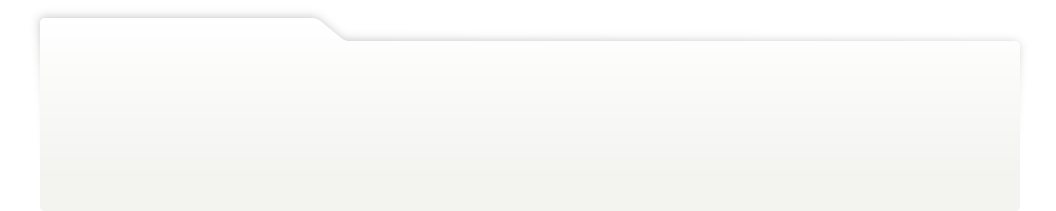
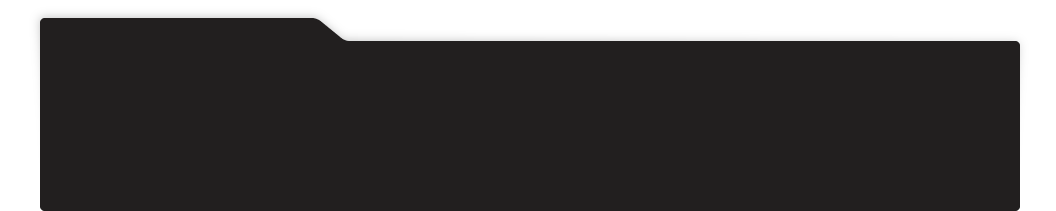
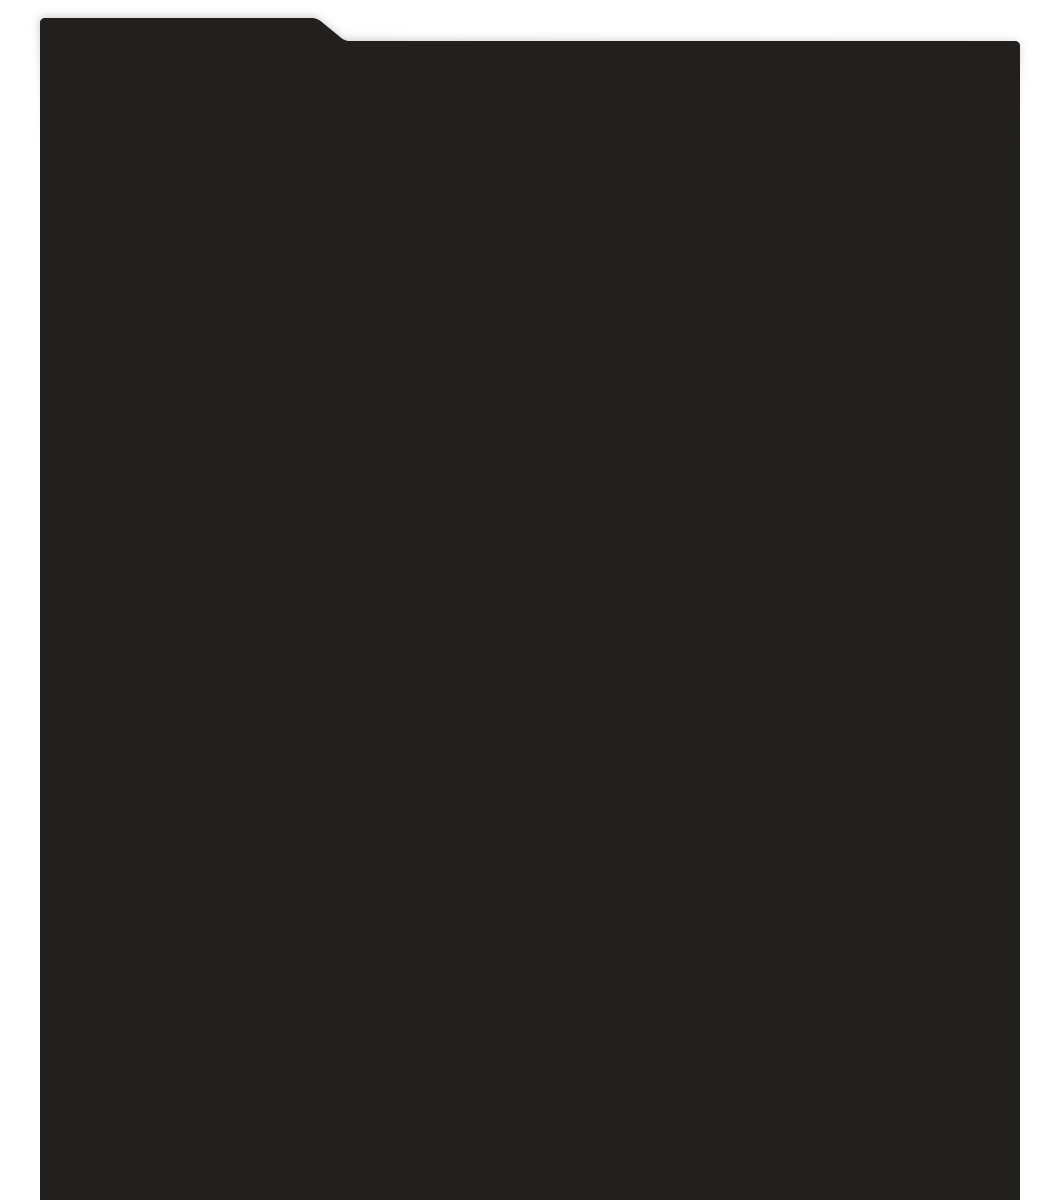
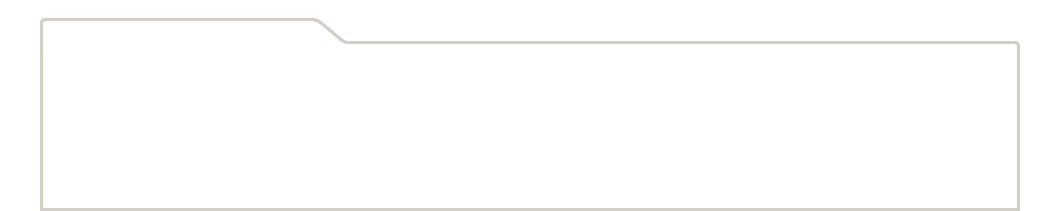
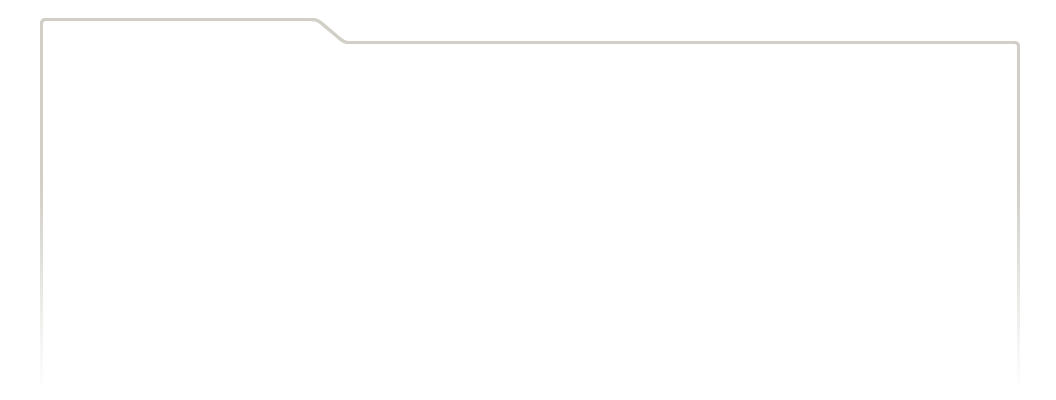
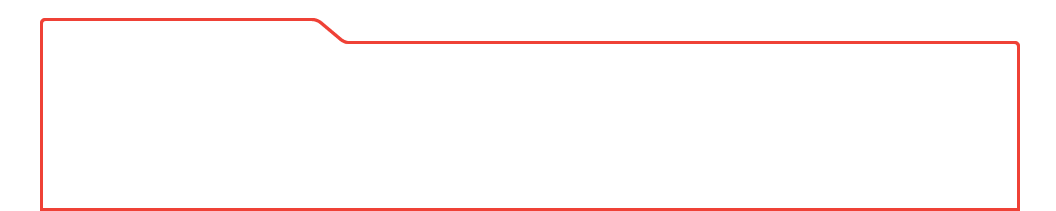
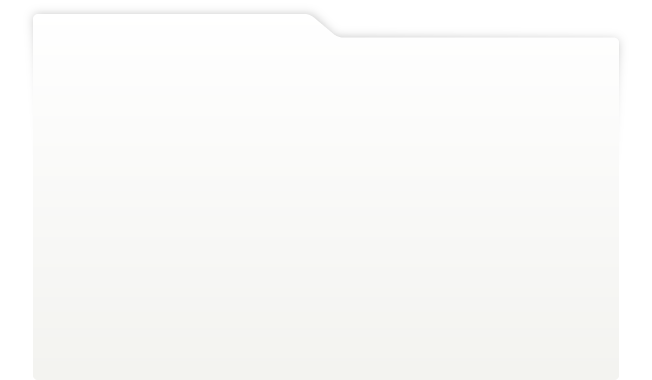
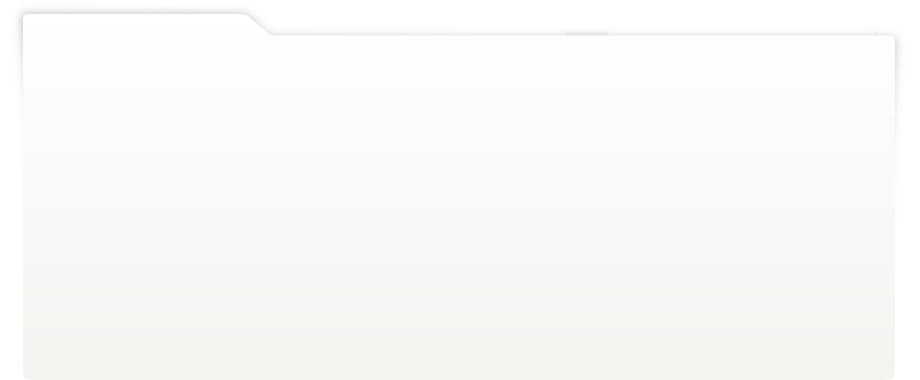
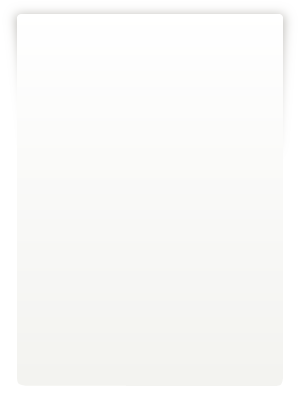
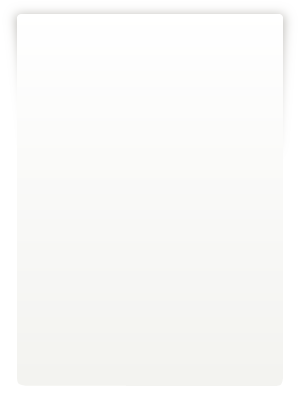
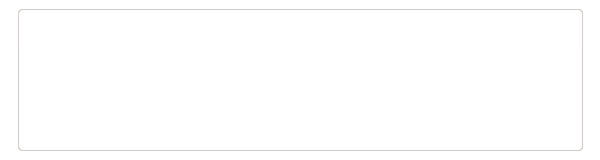
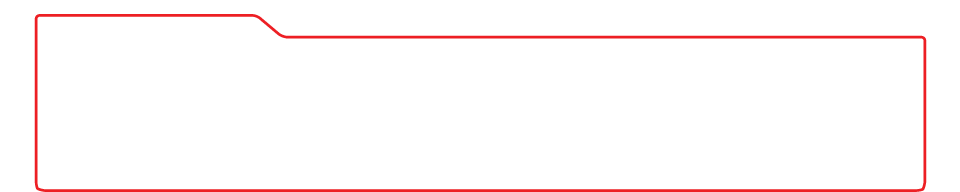
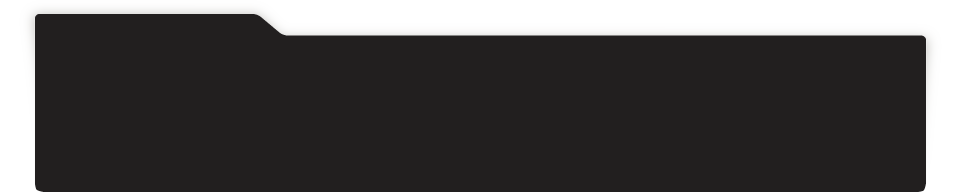
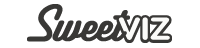
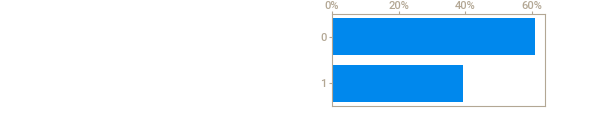
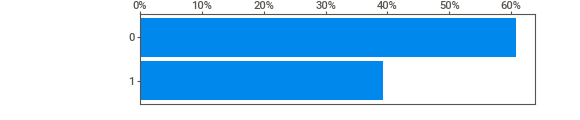
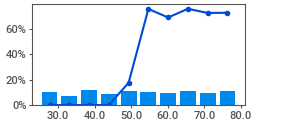
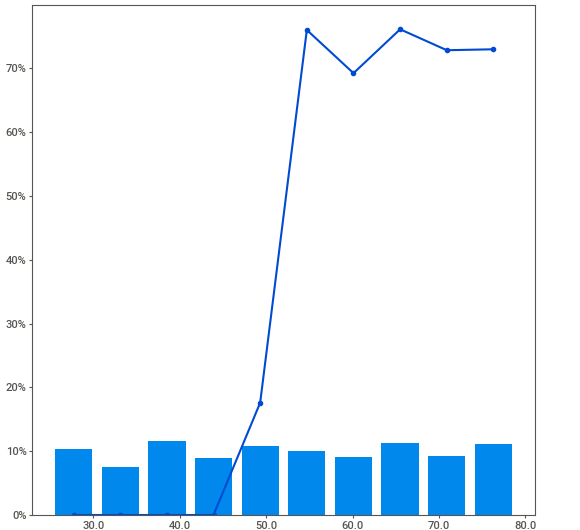
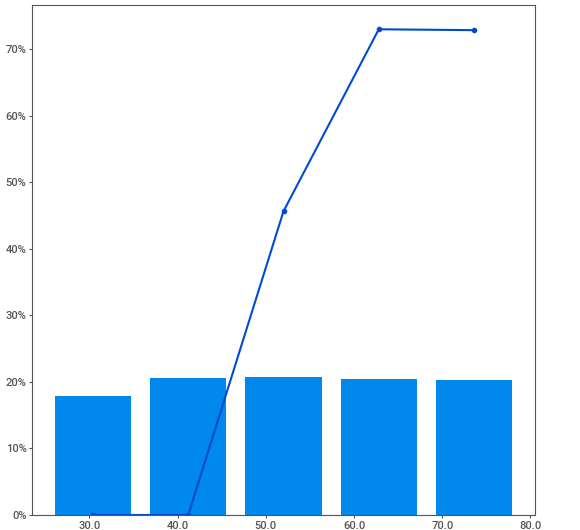
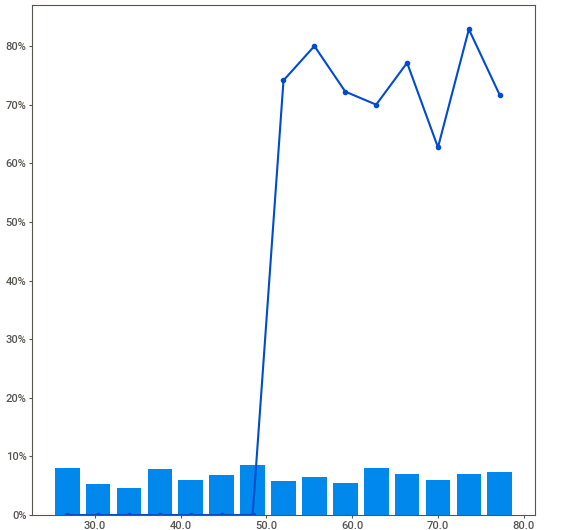
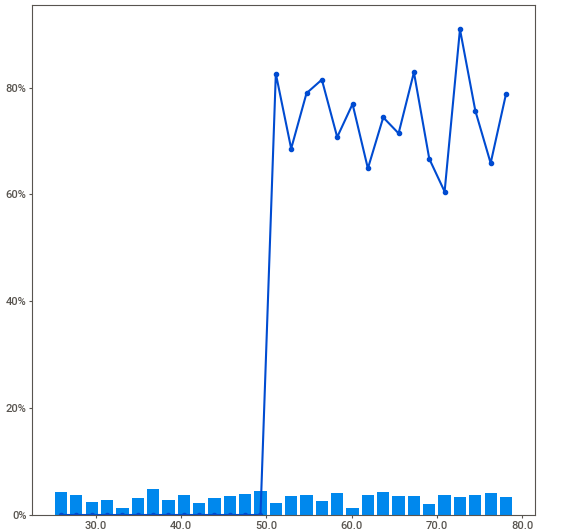
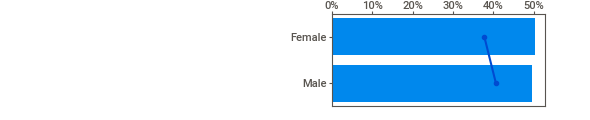
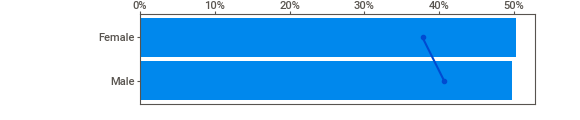
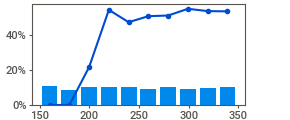
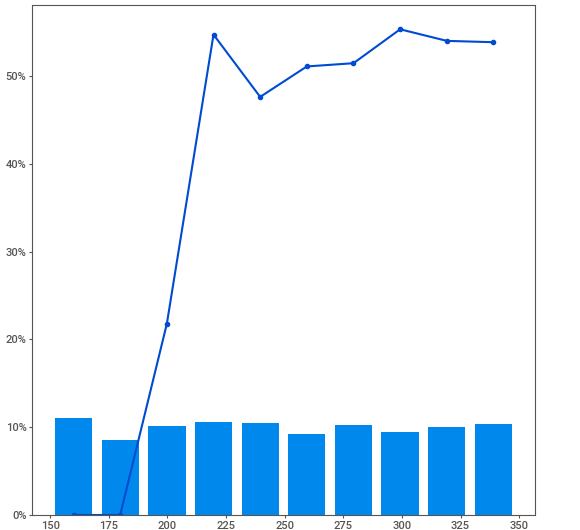
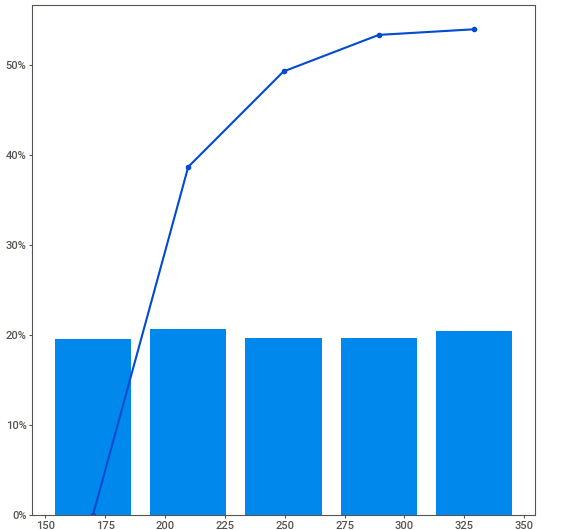
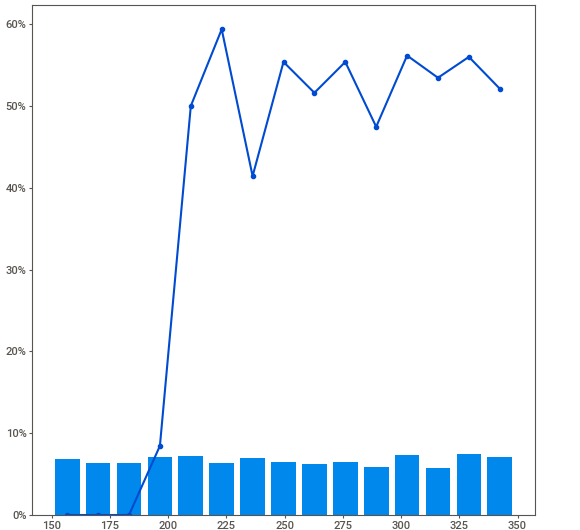
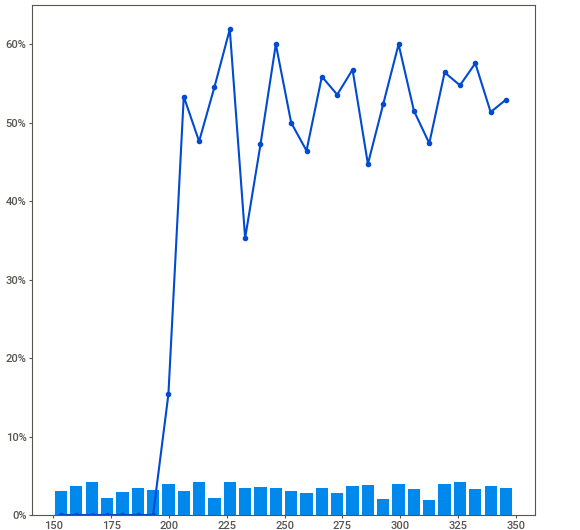
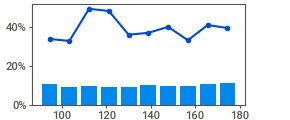
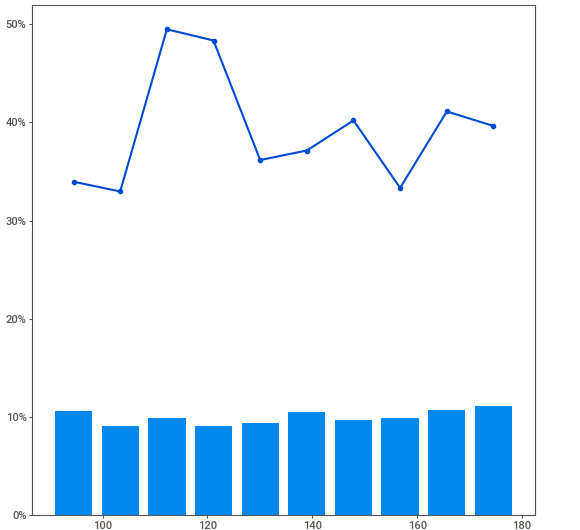
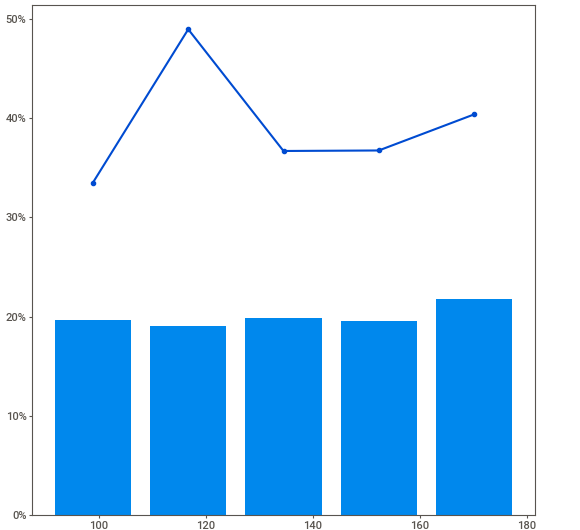
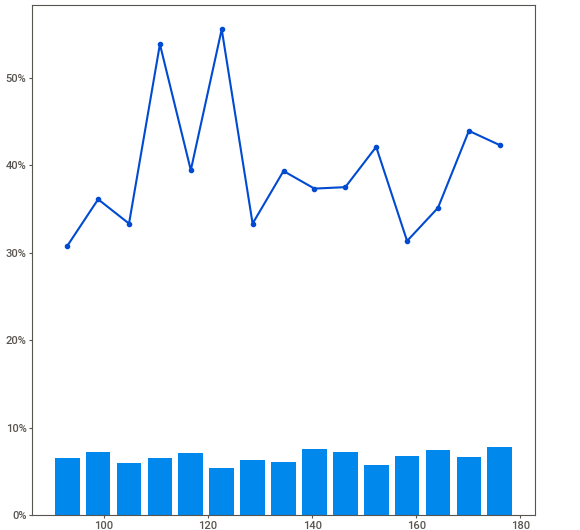
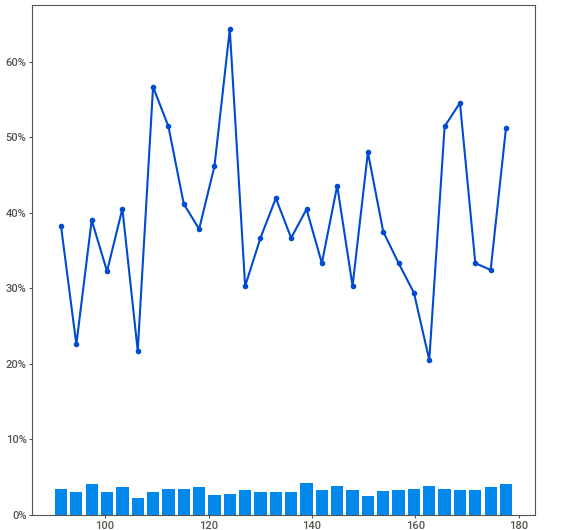
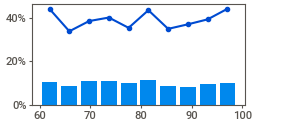
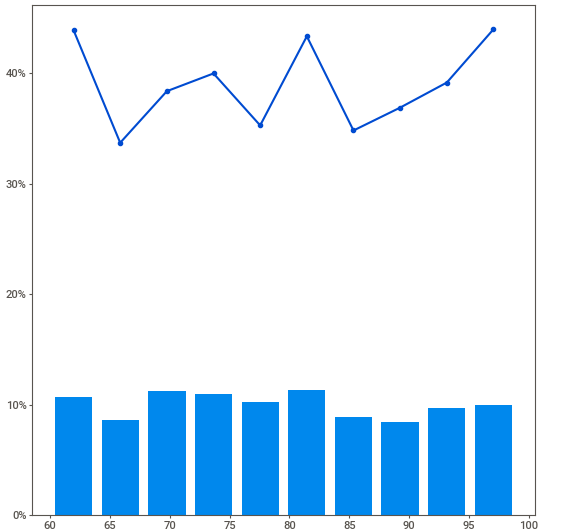
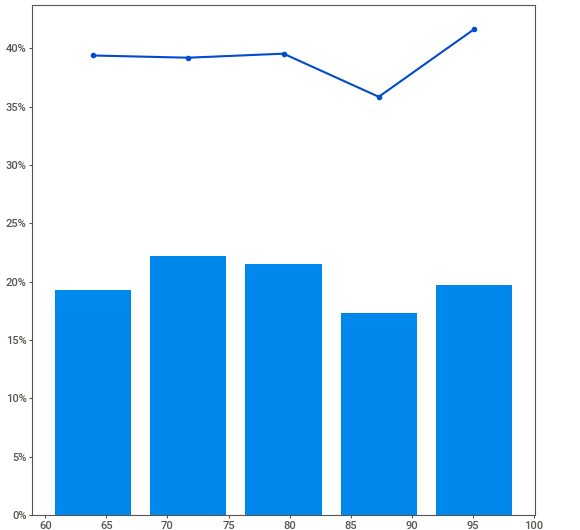
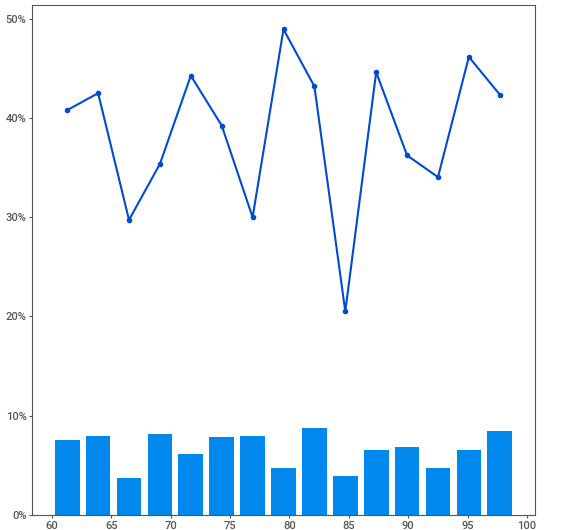
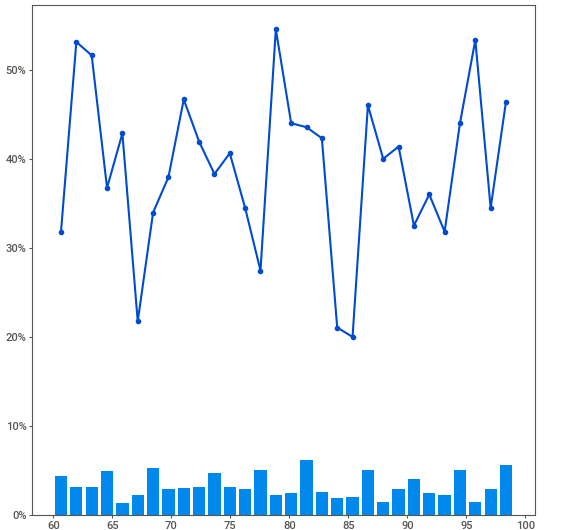
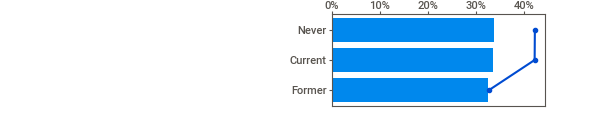
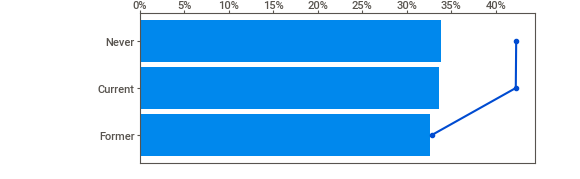
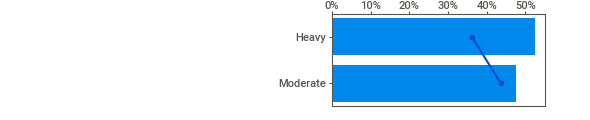
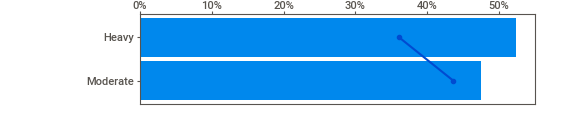
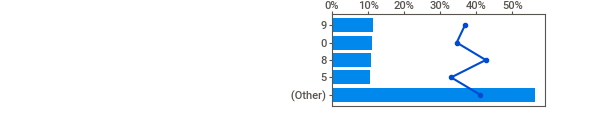
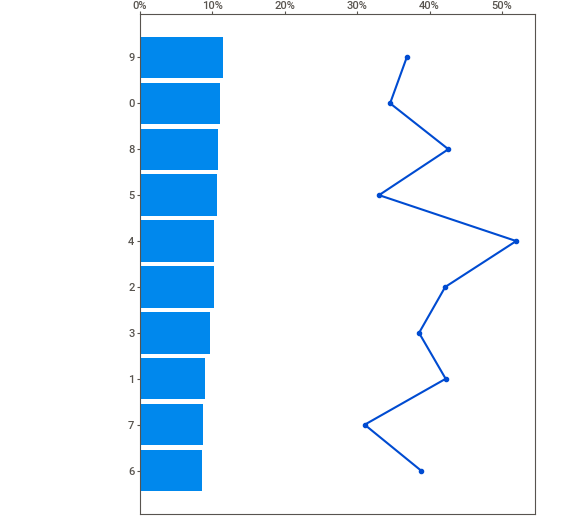
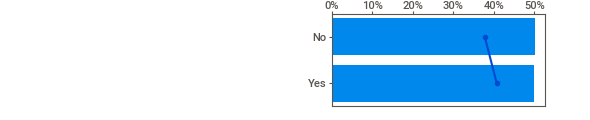
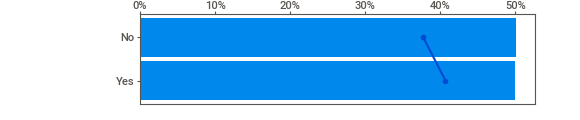
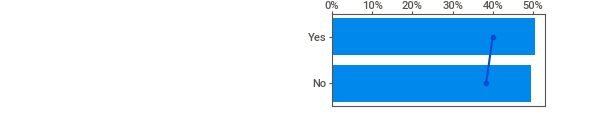
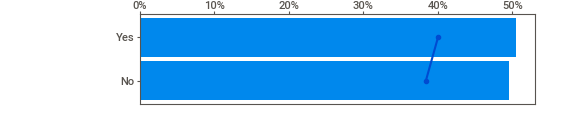
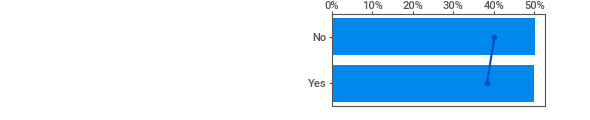
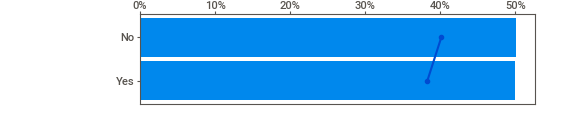
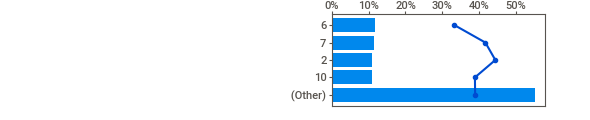
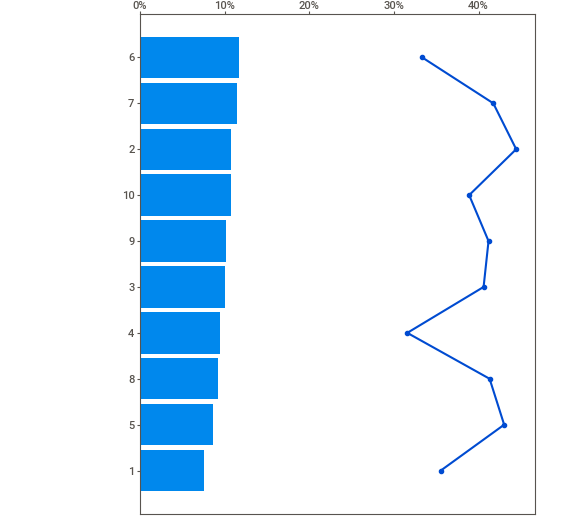
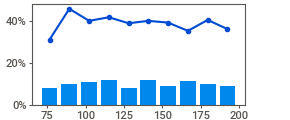
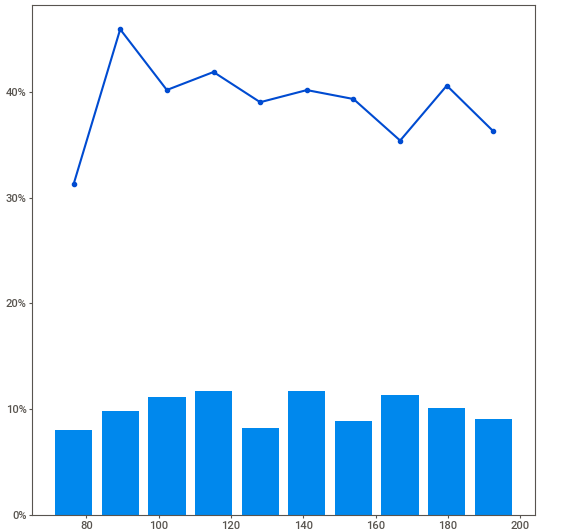
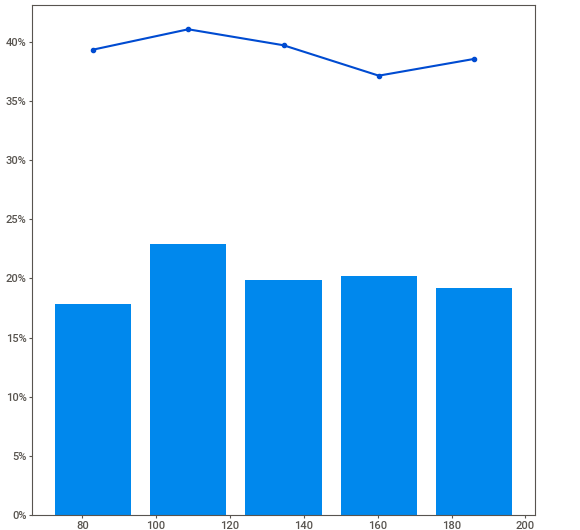
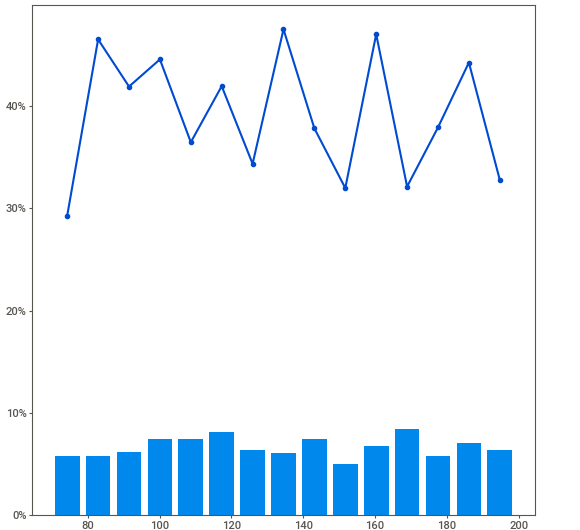
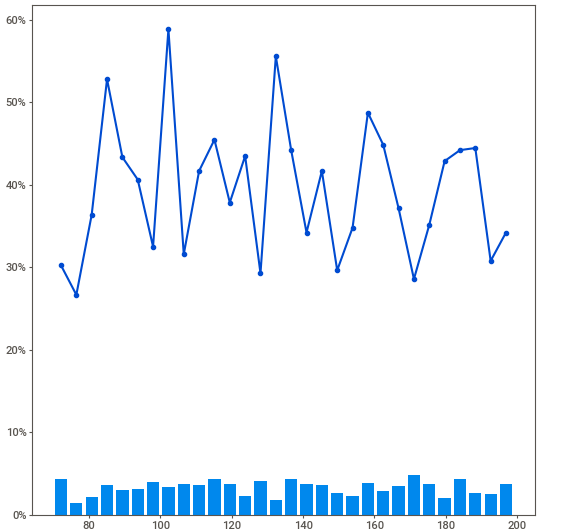
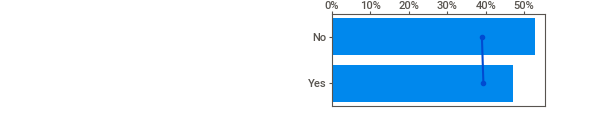
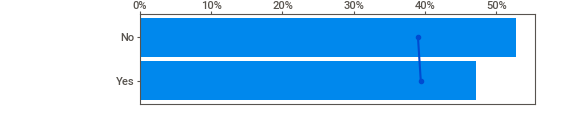
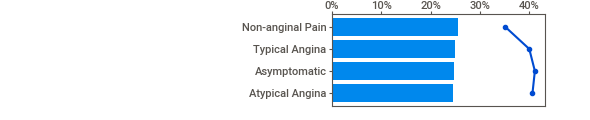
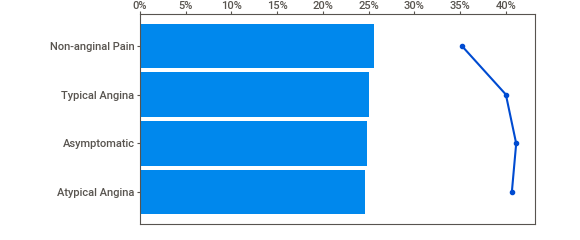
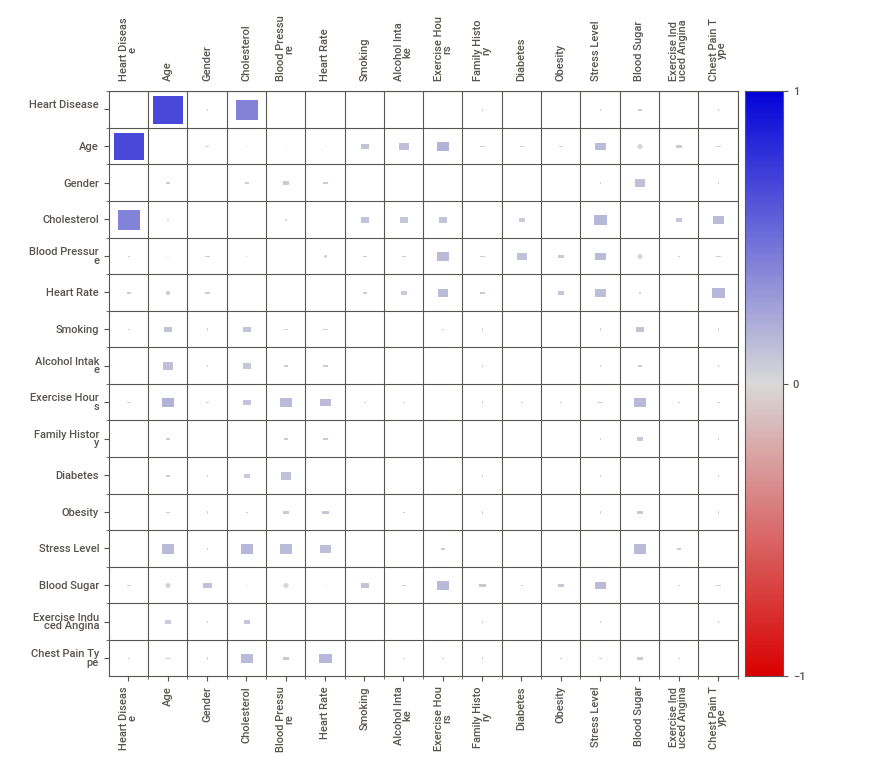
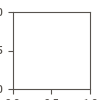

In [ ]:
eda = sv.analyze(source = df, target_feat = 'Heart Disease')
eda.show_notebook()

**Após está primeira analise, podemos concluir que nosso conjunto de dados tem 16 Colunas com 1.000 linhas cada, sendo elas:**

* **Idade:** Começando com 25 anos e indo até 79 anos, com uma média de 52 anos.

* **Gênero:** Dividido em 2 categorias sendo elas **Masculino** e **Feminino**.
* **Colesterol:** Começando em 150 mg/dl e indo até 349 mg/dl, com uma média de 248 mg/dl.
* **Pressão Arterial Média:** Começando com  90 mmHG e indo até 179 mmHG, com uma média de 79 mmHG.
* **Frequência Cardíaca:** Começando com  60 bpm e indo até 99 bpm, com uma média de 79 bpm.
* **Fumante:** Dividido em 3 categorias sendo elas **Sim**, **Não** e **Ex-fumante**.
* **Consumo de Álcool:** Sendo dividido em 3 Categorias **Alto**, **Moderado** e **Não consome**.
* **Horas praticando esportes:** tempo gasto por cada pessoas na pratica de esportes, medido por horas.
* **Histórico de ataque cardíaco:** Dividido em 2 categorias sendo elas **Sim** ou **Não**.
* **Diabetes:** Dividido em 2 categorias sendo elas **Sim** ou **Não**.
* **Obesidade:** Dividido em 2 categorias sendo elas **Sim** ou **Não**.
* **Nível de estresses:** Sendo dividido em uma escala crescente de 1 até 10, sendo 1 níveis baixos e 10 níveis extremamente altos, possuindo uma média de 6.
* **Quantidade de Açúcar no sangue:** Começando com 70 mg/dl e indo até 199 mg/dl, com uma média de 135 mg/dl.
* **Dores no peito ao realizar exercícios físicos:** Dividido em 2 categorias sendo elas **Sim** ou **Não**.
* **Tipo de dor no peito:** Sendo dividida em 4 categorias sendo elas **Dor não anginosa**, **Angina típica**, **Assintomática** e **Angina atípica**.
* **Doença cardíaca:** Dividido em 2 categorias sendo elas **Sim** ou **Não**.


Após conversar com a área de Negócios foi pedido para que eu mantivesse todos os dados e não tratasse os outiliers visto que estamos falando de um problema de saúde onde temos que priorizar salvar o máximo de vidas.

## 3° Passo: Pré-processamento

### 3.1 Verificando a existência de dados nulos no data frame

In [ ]:
nulos = df.isnull().sum()

nulos

,0
Age,0
Gender,0
Cholesterol,0
Blood Pressure,0
Heart Rate,0
Smoking,0
Alcohol Intake,340
Exercise Hours,0
Family History,0
Diabetes,0


Podemos observar que na coluna referente ao consumo de álcool, existem alguns dados faltantes, conversando com o pessoal responsável pela triagem dos pacientes me informaram que quando o paciente não faz consumo de álcool os enfermeiros são orientados para deixar o campo vazio na ficha, fazendo com que retorne como NaN na base.

### 3.2 Tratamento das features categóricas


#### 3.3.1 Categóricas Ordinais

Com base em algumas informações que consegui conversando com a área de negócios do Hospital, que me designou para criar este modelo de previsão, decidi fazer um map nas features categóricas ordinais conseguindo fazer com que meu modelo entenda a importância de cada dado em sua coluna e também aproveito e já trago meus dados para a linguagem de máquina.

In [ ]:
df['Smoking'] = df['Smoking'].map({'Current': 2, 'Former': 1, 'Never': 0})
df['Alcohol Intake'] = df['Alcohol Intake'].map({'Heavy': 2 ,'Moderate': 1, np.nan: 0})
df['Family History'] = df['Family History'].map({'Yes': 1, 'No': 0})
df['Obesity'] = df['Obesity'].map({'Yes': 1, 'No': 0})
df['Exercise Induced Angina'] = df['Exercise Induced Angina'].map({'Yes': 1, 'No': 0})
df['Diabetes'] = df['Diabetes'].map({'Yes': 1, 'No': 0})
df['Chest Pain Type'] = df['Chest Pain Type'].map({'Typical Angina':3, 'Atypical Angina': 2 ,'Non-anginal Pain': 1, 'Asymptomatic': 0})

In [ ]:
df.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,2,2,1,0,0,1,8,119,1,2,1
1,48,Male,204,165,62,2,0,5,0,0,0,9,70,1,3,0
2,53,Male,234,91,67,0,2,3,1,0,1,5,196,1,2,1
3,69,Female,192,90,72,2,0,4,0,1,0,7,107,1,1,0
4,62,Female,172,163,93,0,0,6,0,1,0,2,183,1,0,0


#### 3.3.2 Categóricas Nominais

Para realizar o tratamento das variáveis categóricas nominais iremos utilizar o **OneHotEncoder** converte as variáveis categóricas em colunas binárias (0 ou 1). Sendo assim, cada valor único da categoria se transforma em uma nova coluna.



Neste caso irei utilizar ele somente em gênero.

In [ ]:
enconder = OneHotEncoder()
encoded_data = enconder.fit_transform(df[['Gender']])

In [ ]:
#convertendo o resultado em um novo dataframe

encoded_df = pd.DataFrame(encoded_data.toarray(), columns = enconder.get_feature_names_out())

In [ ]:
# Concatenar os DataFrames
df_final = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

#Removendo as colunas categóricas originais
df_final.drop(['Gender'], axis=1, inplace=True)

In [ ]:
df_final.head()

,Age,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease,Gender_Female,Gender_Male
0,75,228,119,66,2,2,1,0,0,1,8,119,1,2,1,1.0,0.0
1,48,204,165,62,2,0,5,0,0,0,9,70,1,3,0,0.0,1.0
2,53,234,91,67,0,2,3,1,0,1,5,196,1,2,1,0.0,1.0
3,69,192,90,72,2,0,4,0,1,0,7,107,1,1,0,1.0,0.0
4,62,172,163,93,0,0,6,0,1,0,2,183,1,0,0,1.0,0.0


In [ ]:
df_final

,Age,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease,Gender_Female,Gender_Male
0,75,228,119,66,2,2,1,0,0,1,8,119,1,2,1,1.0,0.0
1,48,204,165,62,2,0,5,0,0,0,9,70,1,3,0,0.0,1.0
2,53,234,91,67,0,2,3,1,0,1,5,196,1,2,1,0.0,1.0
3,69,192,90,72,2,0,4,0,1,0,7,107,1,1,0,1.0,0.0
4,62,172,163,93,0,0,6,0,1,0,2,183,1,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,56,269,111,86,0,2,5,0,1,1,10,120,0,1,1,1.0,0.0
996,78,334,145,76,0,0,6,0,0,0,10,196,1,3,1,1.0,0.0
997,79,151,179,81,0,1,4,1,0,1,8,189,1,0,0,0.0,1.0
998,60,326,151,68,1,0,8,1,1,0,5,174,1,2,1,1.0,0.0


In [ ]:
# procurando se existem colunas com linhas que têm pelo menos um valor nulo
nulos = df_final[df_final.isnull().any(axis=1)]
nulos.head()

,Age,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease,Gender_Female,Gender_Male


### 3.4 Padronização das variáveis numéricas

O **StandardScaler** padroniza os dados, ajustando-os para terem média 0 e desvio padrão 1, removendo assim a média e escalando pela variância. Isso é útil para evitar que variáveis com diferentes escalas influenciem desproporcionalmente no modelo.








In [ ]:
padronizacao = StandardScaler()
columns_to_scale = ['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Exercise Hours', 'Stress Level', 'Blood Sugar']
scaled_values = padronizacao.fit_transform(df_final[columns_to_scale])
df_final[columns_to_scale] = scaled_values
df_final

,Age,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease,Gender_Female,Gender_Male
0,1.444534,-0.379005,-0.617287,-1.150139,2,2,-1.203298,0,0,1,0.831917,-0.434581,1,2,1,1.0,0.0
1,-0.273104,-0.793616,1.126782,-1.498561,2,0,0.160599,0,0,0,1.185323,-1.770413,1,3,0,0.0,1.0
2,0.044977,-0.275353,-1.678894,-1.063034,0,2,-0.521350,1,0,1,-0.228300,1.664583,1,2,1,0.0,1.0
3,1.062836,-1.000921,-1.716808,-0.627507,2,0,-0.180375,0,1,0,0.478511,-0.761724,1,1,0,1.0,0.0
4,0.617523,-1.346429,1.050953,1.201706,0,0,0.501573,0,1,0,-1.288517,1.310178,1,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.235825,0.329287,-0.920603,0.591968,0,2,0.160599,0,1,1,1.538729,-0.407320,0,1,1,1.0,0.0
996,1.635382,1.452189,0.368491,-0.279086,0,0,0.501573,0,0,0,1.538729,1.664583,1,3,1,1.0,0.0
997,1.698998,-1.709213,1.657586,0.156441,0,1,-0.180375,1,0,1,0.831917,1.473749,1,0,0,0.0,1.0
998,0.490290,1.313986,0.595979,-0.975929,1,0,1.183521,1,1,0,-0.228300,1.064821,1,2,1,1.0,0.0


## 4° Passo: Validação Hold-out

A validação hold-out é uma técnica de avaliação de modelos onde você divide seu conjunto de dados em duas partes: **conjunto de treinamento** e **conjunto de teste**.

In [ ]:
X = df_final.drop('Heart Disease', axis = 1)
y = df_final['Heart Disease']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 26)

## 5°Passo: Criação da Rede Neural + Tunagem de Hiper parâmetros gridsearch

Com base no artigo do site: https://iaexpert.academy/2020/05/04/quantas-camadas-escondidas-e-quantos-neuronios-incluir-numa-rede-neural-artificial/

Jeff Heaton, o autor de Introduction to Neural Networks for Java, sugere 3 abordagens iniciais, sendo elas:

1. O número de neurônios escondidos deve estar entre o tamanho da camada de entrada e o da camada de saída. Usar o número médio entre as duas camadas é uma boa opção; ou seja, no nosso exemplo, o valor de (17+1)/2 = 9 neurônios.

2. O número de neurônios escondidos deve ser 2/3 do tamanho da camada de entrada, mais o tamanho da camada de saída. Assim, a camada escondida no nosso exemplo deve conter 17*2/3+1 = 8.5 neurônios.
(Como não existe meio neurônio irei utilizar 8)

3. O número de neurônios escondidos deve ser menor que o dobro do tamanho da camada de entrada. Ou seja, a camada escondida deve conter menos que 34 neurônios.

In [ ]:
# Grade de parâmetros para busca
param_grid = {
    'hidden_layer_sizes': [(17), (17, 9), (17, 8), (17, 34)], #camadas
    'max_iter': [100, 500, 1000], #épocas
    'tol': [0.00001], # tolerância de parada
    'learning_rate_init': [0.01], #taxa de aprendizagem inicial
    'activation': ['tanh', 'relu'], #Função de ativação
    'solver': ['lbfgs', 'adam'], #métodos de otimização
    'alpha': [0.0001, 0.001, 0.01], # força da regularização
    'learning_rate': ['constant', 'adaptive'], #taxa de aprendizagem
}

# MLPClassifier
mlp = MLPClassifier(random_state=26)

# Grid Search
grid_search = GridSearchCV(mlp, param_grid, scoring='roc_auc', n_jobs=-1, cv=5, verbose=1)
grid_search.fit(x_train, y_train)

# Melhores resultados
print("Melhores parâmetros encontrados:", grid_search.best_params_)
print("Melhor AUC-ROC obtida:", grid_search.best_score_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Melhores parâmetros encontrados: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': 17, 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'max_iter': 100, 'solver': 'lbfgs', 'tol': 1e-05}
Melhor AUC-ROC obtida: 0.9958544198080517


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### 5.1 Arquitetura do melhor modelo

**A melhor arquitetura para o modelo foi**:

* **Camadas**: 2 camadas sendo a inicial com 17 neuronios e a segunda com 8 neuronios
* **Épocas**: 500
* **Tolerância de parada**: 0.00001
* **Taxa de aprendizagem inicial**: 0.01
* **Função de Ativação**: Função tangente hiperbólica
* **Força da regularização**: 0.001
* **Taxa de aprendizagem**: Constant
* **Metodo de otimização**: lbfgs

### 5.2 Análise dos resultados

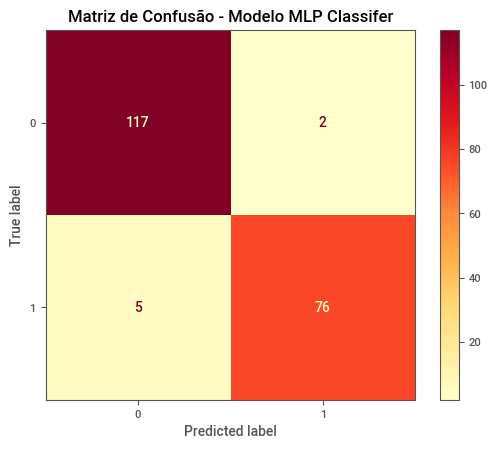

In [ ]:
# Melhor modelo após a busca com GridSearchCV
best_mlp = grid_search.best_estimator_

# Fazer previsões no conjunto de teste
y_pred = best_mlp.predict(x_test)

# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Visualizar a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.YlOrRd)
plt.title('Matriz de Confusão - Modelo MLP Classifer')
plt.show()


**Análise dos Resultados:**

O modelo conseguiu um desempenho de 99.59% de acurácia, algo que seria extremamente bom na maioria dos casos, porém no nosso caso trata-se de uma previsão médica, e por isso nosso modelo ainda tem muito o que melhorar, para que isso seja possível precisamos de um maior volume e uma maior variabilidade dos dados para conseguirmos uma melhora em sua assertividade.

Neste conjunto pequeno de dados nosso modelo errou 0,41% sendo 7 casos de 200 pacientes, destes 5 casos foram falsos positivos onde o modelo aponta que possuíam a doença e realmente não possuíam e 2 foram falsos negativos casos em que ele falava que não tinha a doença e realmente tinha.



# Conclusão:


**Conclusão:**
Apesar do alto desempenho do modelo com uma acurácia de 99,59%, ele ainda apresenta limitações importantes, especialmente por se tratar de uma aplicação médica. O pequeno volume de dados e a falta de variabilidade influenciam nos erros, que, embora baixos, podem ter consequências graves, como falsos positivos e falsos negativos. Para melhorar a confiabilidade do modelo, é necessário trabalhar com um conjunto de dados maior e mais diversificado, visando reduzir esses erros críticos.



